In [1]:
import pandas as pd
data = pd.read_csv('../data/wine.csv')

### 5.2
Проанализируйте представленный датасет и перечислите все числовые признаки через запятую

In [2]:
temp=data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


### 5.3
Проанализируйте датасет на наличие дублирующихся винных обзоров. Если дублирующиеся записи есть, удалите их.

В поле ниже введите, сколько дублирующихся записей вам удалось обнаружить

In [3]:
dupl_columns = list(data.columns)                          #создаем список имен столбцов
# dupl_columns.remove('id')                                       #удаляем из списка имя ID

mask = data.duplicated(subset=dupl_columns)                #фильтор по совпадению столбцов из списка
r_duplicates = data[mask]                               #передаем DF с дублекатами
# В одну строку
r_duplicates = data[data.duplicated(subset=dupl_columns)]

print(f'Число найденных дубликатов: {r_duplicates.shape[0]}')

Число найденных дубликатов: 9983


In [4]:
data_int=data.shape[0]                                 #начально значение строк
data_copy=data.drop_duplicates(ignore_index=True)      #УДАЛЕНИЕ ДУБЛЕКАТОВ и сохранение в новую переменную
print('копий удалось:',data_int-data_copy.shape[0])    #(начальное значение)-(итоговое значение)   

копий удалось: 9983


### 5.4
Проверьте датасет на наличие пропусков в данных.

В каких из представленных признаках были обнаружены пропуски?

In [5]:
data_copy.isnull().sum ()

country                     59
description                  0
designation              34545
points                       0
price                     8395
province                    59
region_1                 19560
region_2                 73219
taster_name              24917
taster_twitter_handle    29446
title                        0
variety                      1
winery                       0
dtype: int64

### 5.5
Обработайте пропущенные значения в наборе данных любым известным вам способом, который вы изучили в модуле PYTHON-14. Очистка данных.

+ 1 поиск пропусков

In [6]:
cols_null_percent = data_copy.isnull().mean() * 100 # превращает в serias
# фмльтор и сортировка
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

region_2                 61.021936
designation              28.790379
taster_twitter_handle    24.540787
taster_name              20.766243
region_1                 16.301630
price                     6.996533
country                   0.049172
province                  0.049172
variety                   0.000833
dtype: float64

In [7]:
import plotly.express as px

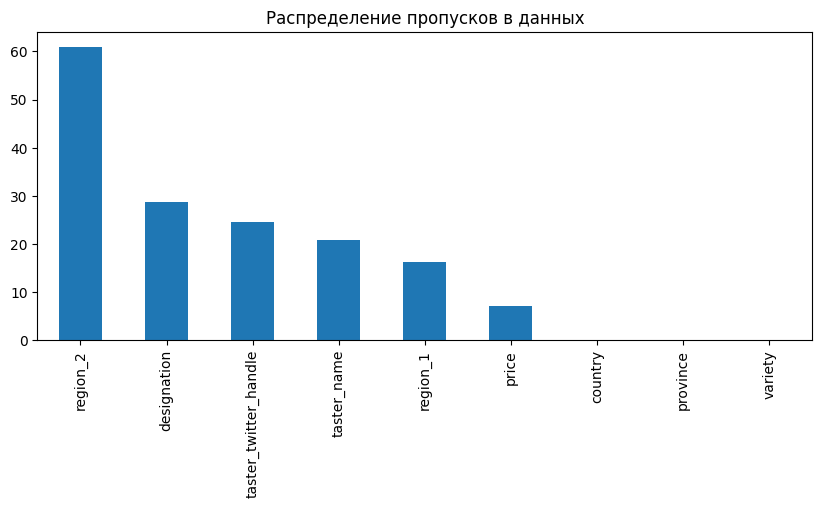

In [8]:
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

fig=px.bar(
    data_frame=cols_with_null
)
# fig.show()

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

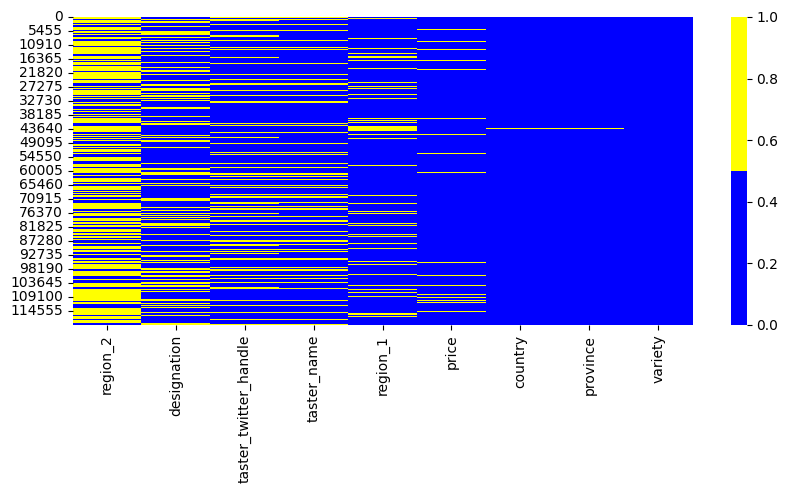

In [10]:
colors = ['blue', 'yellow']       # Список с палитрой цветов 0-1
fig = plt.figure(figsize=(10, 4)) # Размер графика
cols = cols_with_null.index       # Создали переменную и именем столбцов взяли из serias
ax = sns.heatmap(                 # график seaborn. тепловая карта
    data_copy[cols].isnull(),     # DF[ столбцы ]. функция
    cmap=sns.color_palette(colors),#как красить
)

+ 2 удуление

In [11]:
#создаем копию исходной таблицы
drop_data = data_copy.copy()
#задаем минимальный порог: вычисляем 70% от числа строк
t = drop_data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = drop_data.dropna(thresh=t, axis=1)
# drop_data = drop_data.dropna(how='any', axis=0) #удаляем записи, в которых есть хотя бы 1 пропуск
t = drop_data.shape[1]
drop_data = drop_data.dropna(thresh=t-2, axis=0) #удаляем строку , в которых есть хотя бы 2 пропуск
#отображаем результирующую долю пропусков
drop_data.isnull().mean()

country                  0.000000
description              0.000000
designation              0.235803
points                   0.000000
price                    0.059263
province                 0.000000
region_1                 0.170750
taster_name              0.138583
taster_twitter_handle    0.177979
title                    0.000000
variety                  0.000000
winery                   0.000000
dtype: float64

+ 3 заполнение пропусков

In [15]:
#создаем копию исходной таблицы
indicator_data = drop_data.copy()


cols_null_percent = indicator_data.isnull().mean() * 100 # превращает в serias
# фмльтор и сортировка
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)

# Создаём новые признаки с пропуском
# в цикле пробегаемся по названиям столбцов с пропусками
for col in cols_with_null.index:
    #создаем новый признак-индикатор как col_was_null
    indicator_data[col + '_was_null'] = indicator_data[col].isnull()


#создаем словарь имя столбца: число(признак) на который надо заменить пропуски   
values = {
    'price': indicator_data['price'].median(),
    'designation': 'unknown',
    'region_1': indicator_data['region_1'].mode()[0],
    'taster_name': 'unknown',
    'taster_twitter_handle': 'unknown'
}
# #заполняем пропуски в соответствии с заявленным словарем
indicator_data = indicator_data.fillna(values)
#выводим результирующую долю пропусков
indicator_data.isnull().mean()

country                           0.0
description                       0.0
designation                       0.0
points                            0.0
price                             0.0
province                          0.0
region_1                          0.0
taster_name                       0.0
taster_twitter_handle             0.0
title                             0.0
variety                           0.0
winery                            0.0
designation_was_null              0.0
taster_twitter_handle_was_null    0.0
region_1_was_null                 0.0
taster_name_was_null              0.0
price_was_null                    0.0
dtype: float64